In [13]:
from __future__ import print_function

import pickle
import re
import sys

from future.utils import itervalues
from future.utils import iterkeys
from future.utils import iteritems

import numpy as np
import matplotlib.pyplot as plt
from pyartm_experiments.common import default_plot

%matplotlib inline

In [14]:
def plot(T, phi_alpha, theta_alpha):
    default_plot.eval_experiment_res(
        'online_thetaless', '20news_experiment/20news_{}t_online_thetaless_b500_{}_{}.pkl'.format(T, phi_alpha, theta_alpha),
        'online_default', '20news_experiment/20news_{}t_online_default_b500_{}_{}.pkl'.format(T, phi_alpha, theta_alpha),
    )

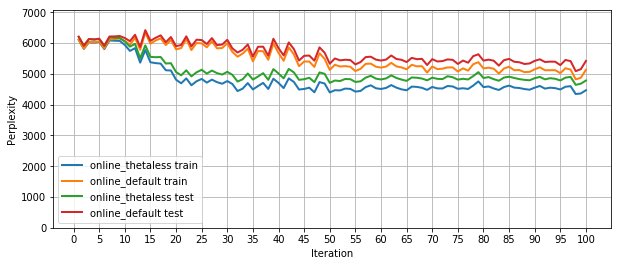

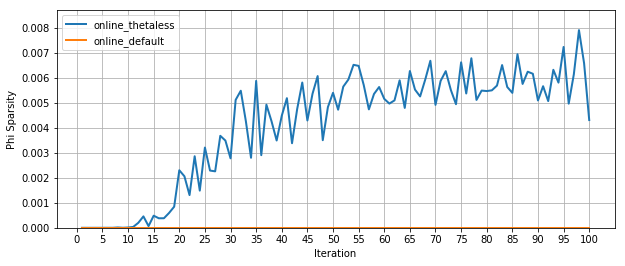

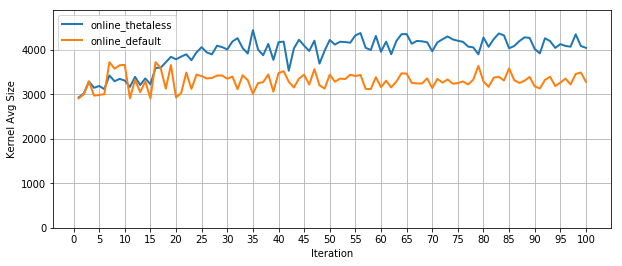

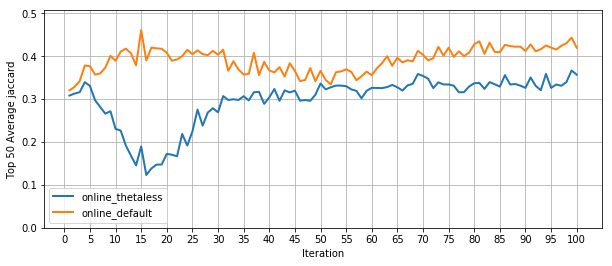

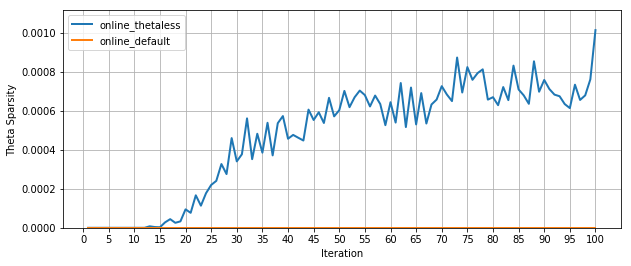

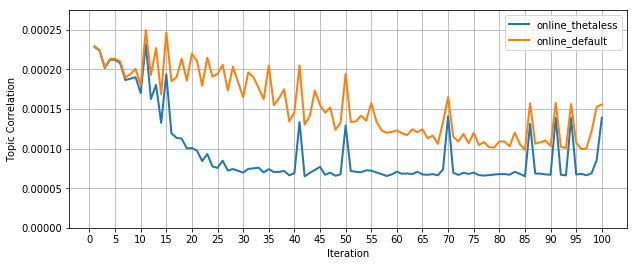

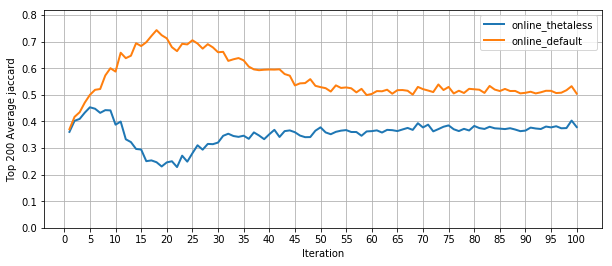

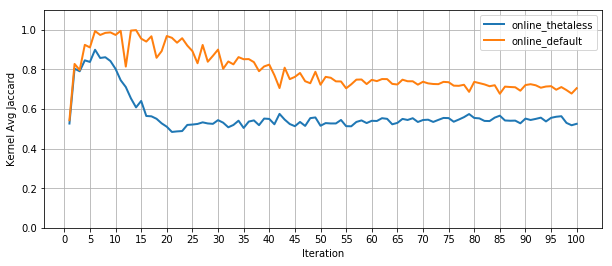

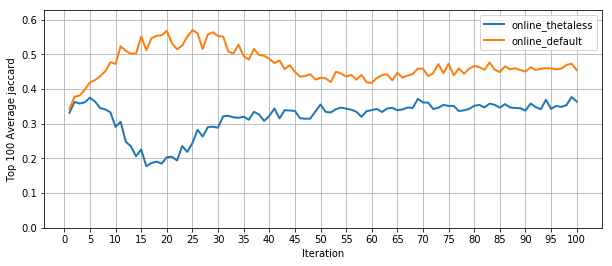

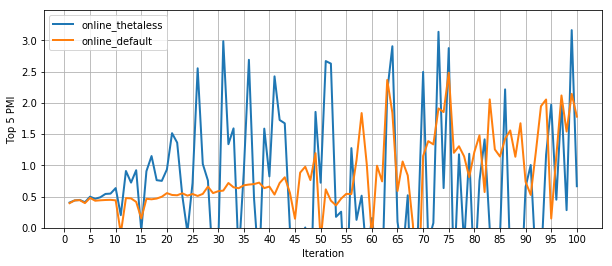

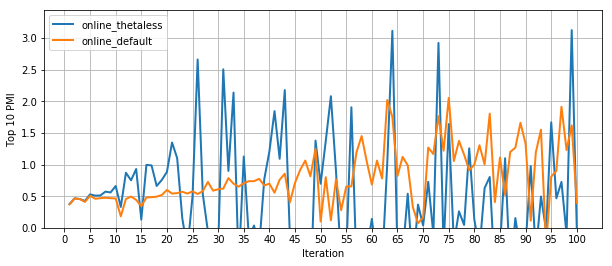

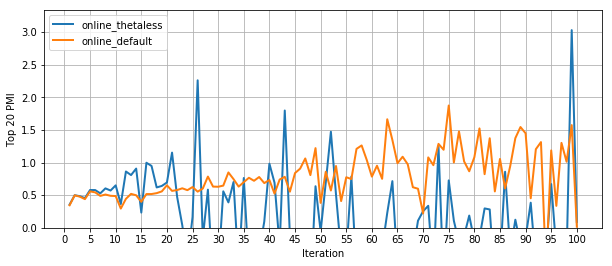

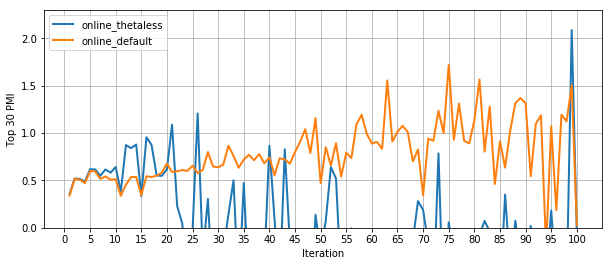

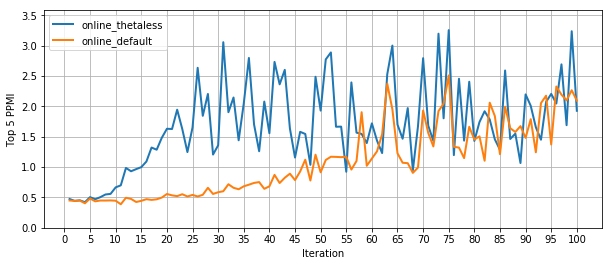

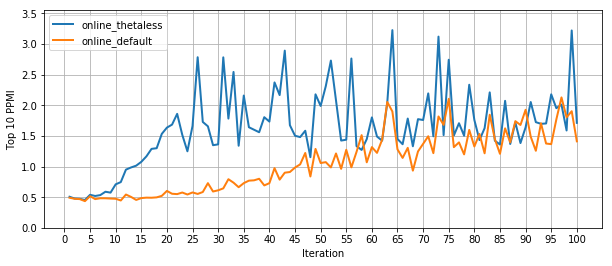

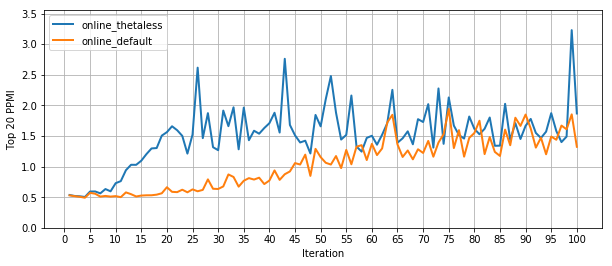

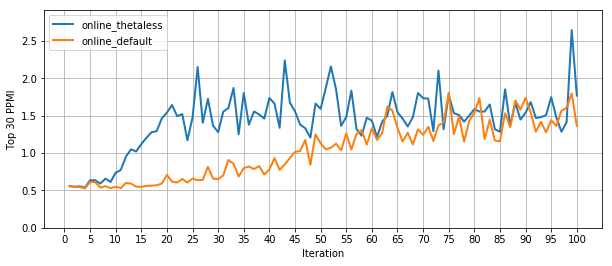

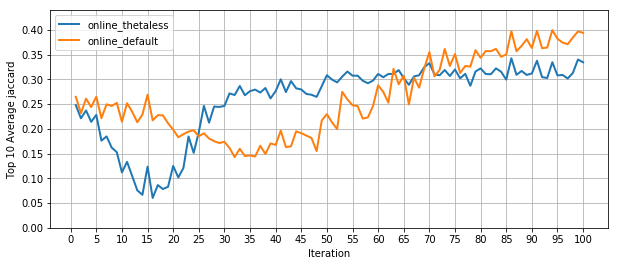

In [18]:
plot(25, 0.1, 0.)

In [37]:
def plot(filename):
    font = {
        'family' : 'sans-serif',
        'size'   : 21,
        'sans-serif': ['Times New Roman']
    }
    plt.rc('font', **font)

    fig = plt.figure(figsize=(20, 19))
    x_ticks = np.arange(0, 101, 10)
    
    
    for T in [10, 25]:
        ax = fig.add_subplot(2, 2, T / 10 * 2 - 1)
        ax.set_xticks(x_ticks)
        with open('20news_experiment/20news_{}t_online_default_b500_0.1_0.0.pkl'.format(T), 'r') as f:
            data = pickle.load(f)
        values = np.mean(data['train_perplexity'], axis=0)
        plt.plot(range(len(values)), values, linewidth=3)
        with open('20news_experiment/20news_{}t_online_thetaless_b500_0.1_0.0.pkl'.format(T), 'r') as f:
            data = pickle.load(f)
        values = np.mean(data['train_perplexity'], axis=0)
        if T == 10:
            plt.ylim(4000, 5600)
        else:
            plt.ylim(4200, 6500)
        plt.plot(range(len(values)), values, linewidth=3)
        plt.xlabel(u'Номер итерации')
        plt.ylabel(u'Перплексия на обучающей выборке')
        plt.title(u'|T| = {}'.format(T))
        plt.grid()
        
    for T in [10, 25]:
        ax = fig.add_subplot(2, 2, T / 10 * 2)
        ax.set_xticks(x_ticks)
        with open('20news_experiment/20news_{}t_online_default_b500_0.1_0.0.pkl'.format(T), 'r') as f:
            data = pickle.load(f)
        values = np.mean(data['test_perplexity'], axis=0)
        plt.plot(range(len(values)), values, linewidth=3)
        with open('20news_experiment/20news_{}t_online_thetaless_b500_0.1_0.0.pkl'.format(T), 'r') as f:
            data = pickle.load(f)
        values = np.mean(data['test_perplexity'], axis=0)
        if T == 10:
            plt.ylim(4000, 5600)
        else:
            plt.ylim(4200, 6500)
        plt.plot(range(len(values)), values, linewidth=3)
        plt.xlabel(u'Номер итерации')
        plt.ylabel(u'Перплексия на тестовой выборке')
        plt.title(u'|T| = {}'.format(T))
        plt.grid()


    plt.tight_layout()
    plt.subplots_adjust(bottom=.1)
    plt.figlegend(
        labels=['Online ARTM', 'Online TARTM'], 
        loc='lower center', 
        ncol=2
    )

    plt.savefig(filename, format="eps")
    plt.show()

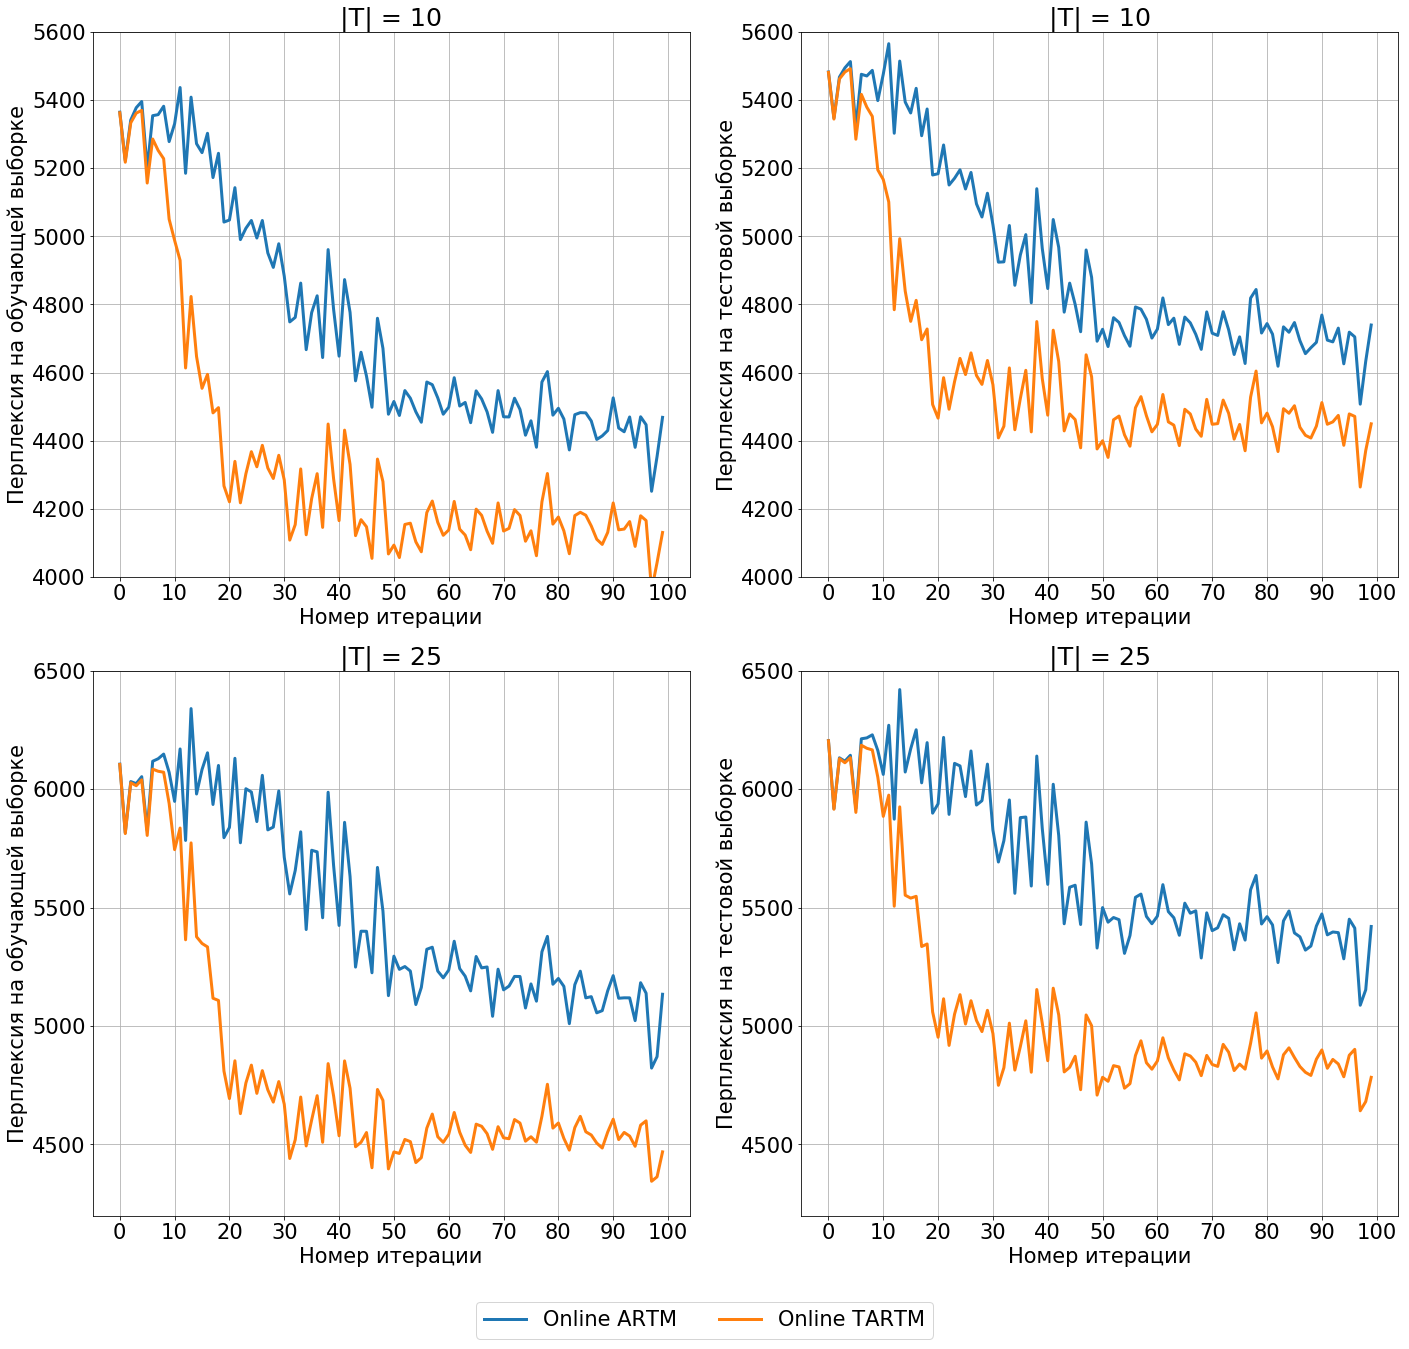

In [38]:
plot('online_artm.eps')